In [1]:
import warnings
warnings.filterwarnings("ignore")
from api import API

Using TensorFlow backend.


In [2]:
redd = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
  'appliances': ['fridge','air conditioner','electric furnace','washing machine'],
  'methods': {
     'Mean': {},
      "AFHMM":{},
      "AFHMM_SAC":{},
      "DSC":{'learning_rate':1e-11,'iterations':300}

  },
'train': {
    'datasets': {
      'Dataport': {
        'path': '../dataport3.hdf5',
        'buildings': {
          54: {
            'start_time': '2015-01-28',
            'end_time': '2015-02-12'
          },
          56: {
            'start_time': '2015-01-28',
            'end_time': '2015-02-12'
          },
          57: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-14'
          },
          62: {
            'start_time': '2014-09-06',
            'end_time': '2014-09-20'
          },
          63: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-14'
          },
          64: {
            'start_time': '2015-04-14',
            'end_time': '2015-04-28'
          },
          65: {
            'start_time': '2014-09-23',
            'end_time': '2014-10-07'
          },
          69: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-14'
          },
          71: {
            'start_time': '2014-12-25',
            'end_time': '2015-01-09'
          },
          72: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-14'
          }
        }

      }
    }
  },
  'test': {
    'datasets': {
      'Datport': {
        'path': '../dataport3.hdf5',
        'buildings': {
          94: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-07'
          },
          103: {
            'start_time': '2014-01-26',
            'end_time': '2014-02-03'
          },
          113: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-07'
          },
          117: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-07'
          },
          122: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-07'
          }
        }
      }
    },
    'metrics': ['mae']
  }
}

Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
Started Prediction using:  Mean
Started Prediction using:  AFHMM
Started Prediction using:  AFHMM_SAC
Num threads  14
finish time is  707.0110971927643
Started Prediction using:  DSC
............  mae  ..............
                        Mean       AFHMM   AFHMM_SAC         DSC
fridge             56.405132   63.944210   52.820984  193.936615
air conditioner   222.787109  396.094269  160.078415  104.552345
electric furnace   73.102295   41.687729   62.826748   45.943275
washing machine     5.046531   65.121635    3.591602    2.744327
Dropping missing values
Started Prediction using:  Mean
Started Prediction using:  AFHMM
Started Prediction using:  AFHMM_SAC
Num threads  16
finish time is  736.0412294864655
Started Prediction using:  DSC
............  mae  ..............
                        Mean      AFHMM  AFHMM_SAC        DSC
fridge             74.519279  79.326706  69.687149  69.711807
a

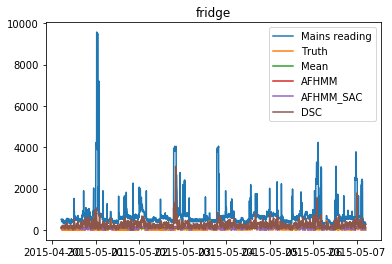

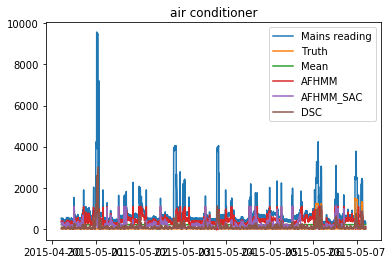

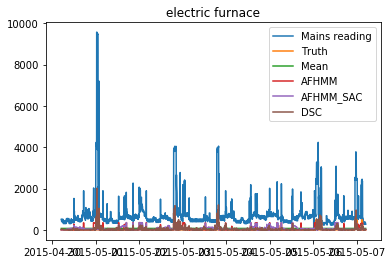

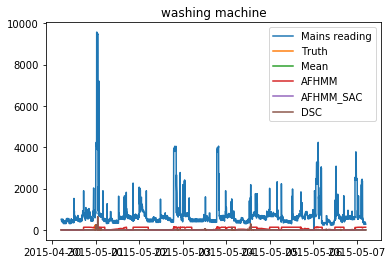

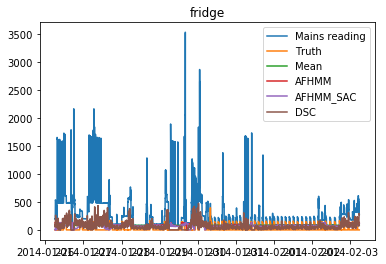

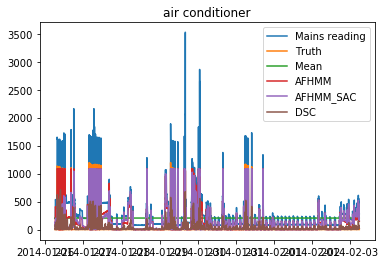

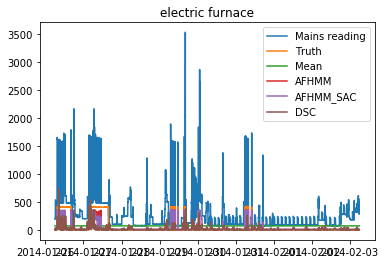

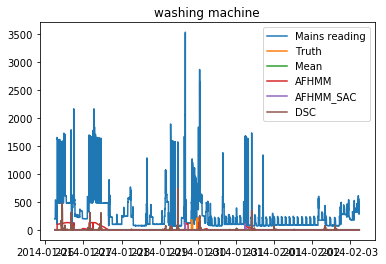

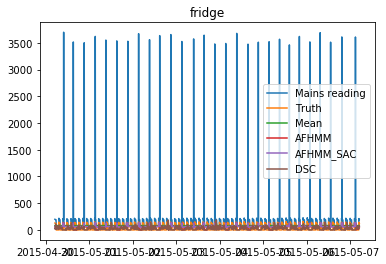

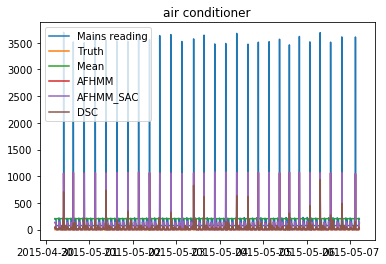

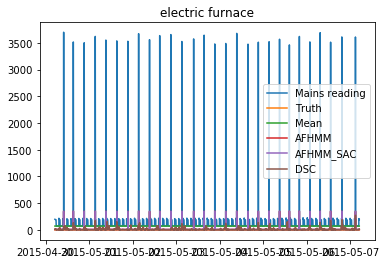

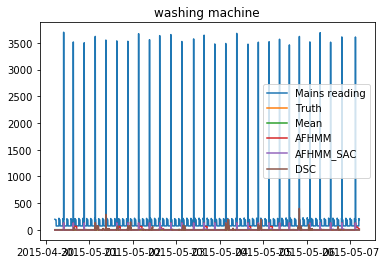

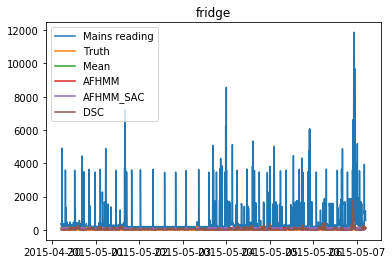

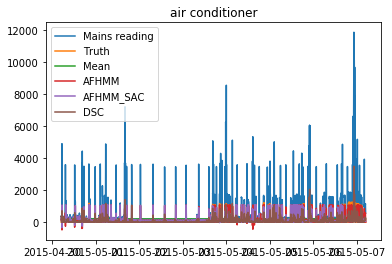

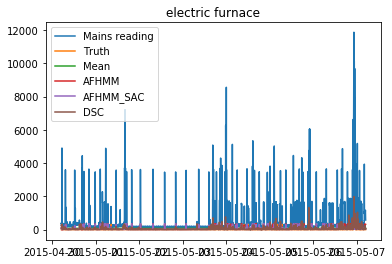

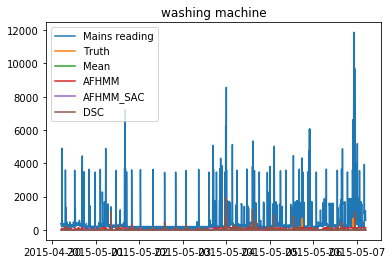

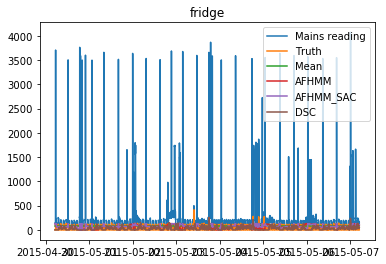

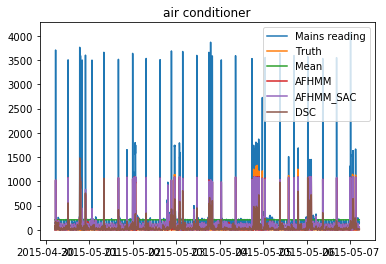

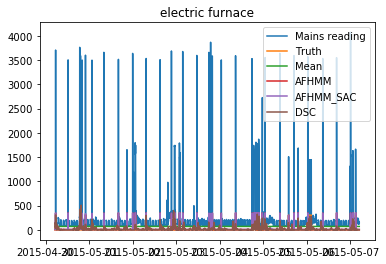

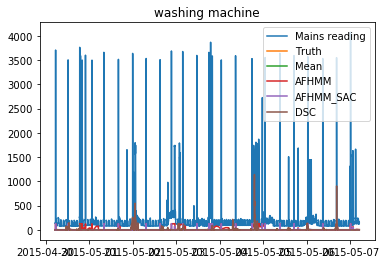

In [3]:
api_res = API(redd)

In [4]:
for i in api_res.errors:
    print (i)
    print ('\n')

                        Mean       AFHMM   AFHMM_SAC         DSC
fridge             56.405132   63.944210   52.820984  193.936615
air conditioner   222.787109  396.094269  160.078415  104.552345
electric furnace   73.102295   41.687729   62.826748   45.943275
washing machine     5.046531   65.121635    3.591602    2.744327


                        Mean      AFHMM  AFHMM_SAC        DSC
fridge             74.519279  79.326706  69.687149  69.711807
air conditioner   221.088806  98.475143  96.645218  52.080593
electric furnace  103.222809  37.293449  46.182709  53.402328
washing machine     5.106009  16.756863   2.897655   5.443237


                        Mean      AFHMM  AFHMM_SAC        DSC
fridge             68.274689  56.511154  58.489479  42.630180
air conditioner   204.862991  43.635101  43.788887  24.954487
electric furnace   71.882378  11.588856  11.683577  11.744411
washing machine     4.318779   9.265728   4.055387   3.688718


                        Mean       AFHMM   AFHMM_

In [5]:
for i in api_res.errors_keys:
    print (i)
    
    print ('\n')

Datport_94_mae


Datport_103_mae


Datport_113_mae


Datport_117_mae


Datport_122_mae




In [6]:
import numpy as np
import pandas as pd

vals = np.concatenate([np.expand_dims(df.values,axis=2) for df in api_res.errors],axis=2)


cols = api_res.errors[0].columns
indexes = api_res.errors[0].index


mean = np.mean(vals,axis=2)
std = np.std(vals,axis=2)
print ('\n\n')
print ("Mean")
print (pd.DataFrame(mean,index=indexes,columns=cols))
print ('\n\n')
print ("Standard Deviation")
print (pd.DataFrame(std,index=indexes,columns=cols))




Mean
                        Mean       AFHMM  AFHMM_SAC        DSC
fridge             63.310463   63.885265  59.272324  78.551831
air conditioner   224.838708  139.947854  97.088445  70.985909
electric furnace   81.581897   26.579608  35.157818  38.926159
washing machine     5.075050   30.756516   3.887723   8.431942



Standard Deviation
                       Mean       AFHMM  AFHMM_SAC        DSC
fridge             7.772509    8.072828   5.776778  58.674362
air conditioner   16.420339  130.202801  40.334877  35.712769
electric furnace  11.657662   12.061272  19.040531  18.349257
washing machine    0.827776   21.322169   0.780472   7.554235
